In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd

from tile_units import TileUnit
from tile_map import Tiling

In [2]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## Cairo
Naturally this is the default tiling option.

<AxesSubplot:>

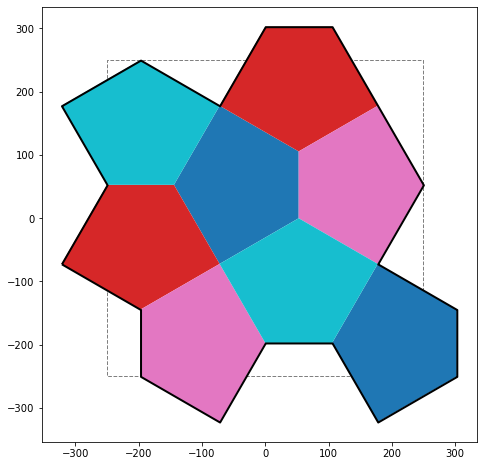

In [12]:
t1 = TileUnit(spacing = 500, crs = 2193)

ax = t1.tile.plot(facecolor = "#00000000", edgecolor = "grey", 
                  linestyle = "dashed", figsize = (15, 8))
t1.elements.plot(ax = ax, column = "element_id", edgecolor = "k", linewidth = 0)
t1.regularised_tile.plot(ax = ax, facecolor = "#00000000", edgecolor = "k",
                         linewidth = 2)

In [4]:
tiling1 = Tiling(t1, ak, id_var = "DZ2018")

In [9]:
mosaic1 = tiling1.get_tiled_map(prioritise_tiles = True)

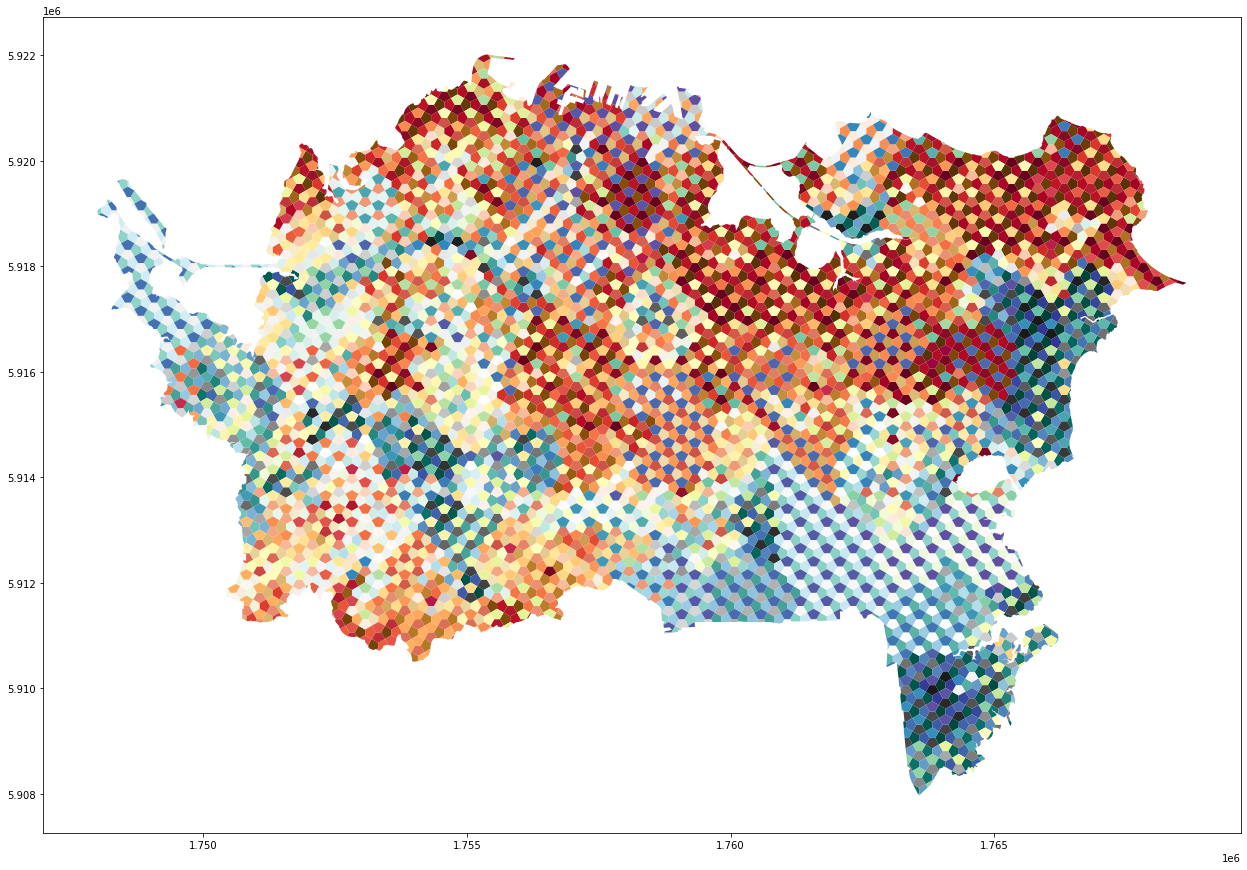

In [10]:
fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)

attributes = pd.Series.unique(mosaic1.element_id)
cols = [x for x in mosaic1.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr")
# cmaps = ["Greys"] * 8

for attribute, col, cmap in zip(attributes, cols, cmaps):
    mosaic1[mosaic1.element_id == attribute].plot(
        ax = ax, column = col, cmap = cmap, k = 100,
        scheme = "equal_interval", linewidth = 0)

# ak.plot(ax = ax, facecolor = "#00000000", edgecolor = "grey")